The scikit learn version is 1.6.1.
(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0
(112, 2) (112,)


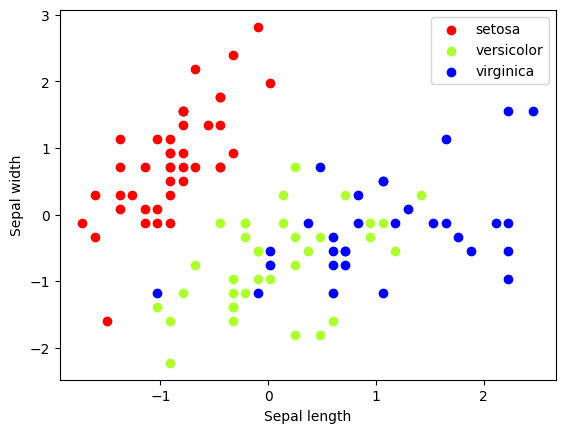

[[-32.14269708  15.56336037]
 [ -0.90532005  -7.3725028 ]
 [  9.99193078  -0.7534223 ]]
[-18.91910087  -3.44066057  -5.07183845]


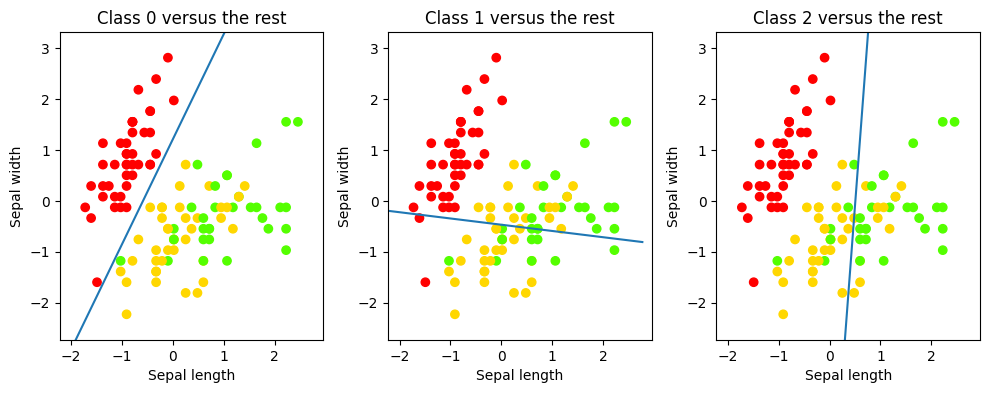

[0]
[[ 22.87958348  -2.92329346 -17.72034467]]
0.8482142857142857
0.6842105263157895
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.44      0.36      0.40        11
   virginica       0.67      0.74      0.70        19

    accuracy                           0.68        38
   macro avg       0.70      0.70      0.70        38
weighted avg       0.67      0.68      0.68        38

[[ 8  0  0]
 [ 0  4  7]
 [ 0  5 14]]
My name is Matthew Murphy
My NetID is: mdmurph
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
[0.76666667 0.73333333 0.73333333 0.86666667 0.56666667]
Mean score: 0.733 (+/- 0.048)


<Figure size 640x480 with 0 Axes>

In [4]:
%run "/content/G&M_SGD_Classifier_Yashvi_Bhatt.py"
#Part 1 — Iris (G&M pp. 10–18, fixed imports)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
TREASURY_CSV_PATH = '/content/Treasury Squeeze test - DS101.csv'
df = pd.read_csv(TREASURY_CSV_PATH)

print("Shape:", df.shape)
print(df.head())
print("Columns:", list(df.columns))
#Part 2 — Treasury Squeeze (same model)


Shape: (900, 12)
   row_id      contract  price_crossing  price_distortion  roll_start  \
0       1  TUZ92 Comdty        0.658597          0.518946    0.180670   
1       2  TUH93 Comdty        0.814456          0.568341    0.426153   
2       3  TUM93 Comdty        0.099210          0.193285    0.724589   
3       4  TUU93 Comdty        0.858873          0.772397    0.057757   
4       5  TUZ93 Comdty        0.161496          0.298359    0.561306   

   roll_heart  near_minus_next  ctd_last_first  ctd1_percent  delivery_cost  \
0    0.900587         0.092346        0.954445      0.174277       0.684746   
1    0.222929         0.672039        0.417641      0.269112       0.252022   
2    0.763612         0.844936        0.290677      0.671427       0.171001   
3    0.087362         0.771464        0.741693      0.059578       0.494068   
4    0.270957         0.752053        0.238855      0.655284       0.847120   

   delivery_ratio  squeeze  
0        0.367047     True  
1        0.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

TARGET_COL = 'squeeze'
drop_cols = ['row_id', 'contract', TARGET_COL]
feature_cols = [c for c in df.columns if c not in drop_cols]

X_df = df[feature_cols].copy()
X_df = X_df.apply(pd.to_numeric, errors='coerce').fillna(0)

y_raw = df[TARGET_COL].copy()
le = LabelEncoder()
y = le.fit_transform(y_raw)

X = X_df.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

clf = SGDClassifier(random_state=42)
clf.fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)
print("Treasury Squeeze accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n",
      classification_report(y_test, y_pred, zero_division=0,
                            target_names=le.classes_.astype(str)))

#Evaluation


Treasury Squeeze accuracy: 0.8111111111111111

Confusion matrix:
 [[172  12]
 [ 39  47]]

Classification report:
               precision    recall  f1-score   support

       False       0.82      0.93      0.87       184
        True       0.80      0.55      0.65        86

    accuracy                           0.81       270
   macro avg       0.81      0.74      0.76       270
weighted avg       0.81      0.81      0.80       270



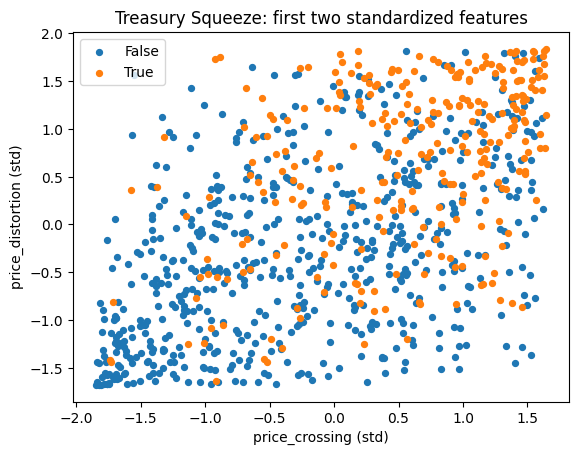

In [8]:
import matplotlib.pyplot as plt

if X.shape[1] >= 2:
    X_std_full = scaler.fit_transform(X)
    plt.figure()
    for code, label in enumerate(le.classes_):
        mask = (y == code)
        plt.scatter(X_std_full[mask, 0], X_std_full[mask, 1], s=18, label=str(label))
    plt.xlabel(f"{feature_cols[0]} (std)")
    plt.ylabel(f"{feature_cols[1]} (std)")
    plt.title("Treasury Squeeze: first two standardized features")
    plt.legend()
    plt.show()
else:
    print("Not enough features to plot (need at least 2).")

#Initial 2-feature scatter


In [9]:
print("My name is Yashvi Bhatt")
print("My NetID is: 676011118")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
#Certification


My name is Yashvi Bhatt
My NetID is: 676011118
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
